In [1]:
#importing relevant libraries.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#Reading the excel file

df_online_retail =pd.read_excel(r'C:\Users\Harshad\Downloads\Kaggle\Capstone project\3. Retail\Project 3\OnlineRetail.xlsx')

In [3]:
#Data inspection.
#Quickly checking seing the format of our dataframe by head method.

df_online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#Shape of DF
df_online_retail.shape

(541909, 8)

In [5]:
#Checking the transnational data just to figure out - which country made highest transaction.
df_online_retail['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

<AxesSubplot:>

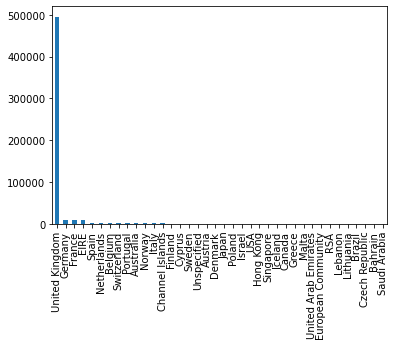

In [6]:
#Bar Plot of all countries who made transaction.
df_online_retail['Country'].value_counts().plot.bar()



**Out of total data of 541909, UK has 495478 data, that is 91% of the data.** 

In [7]:
#Checking the number of customer from different countries.
print('Number of customers from different countries are :')
df_online_retail.groupby('Country')['CustomerID'].agg('count').sort_values(ascending= False)

Number of customers from different countries are :


Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [8]:
#Checking total number of customers.
customers_df = df_online_retail.groupby('Country')['CustomerID'].agg('count').sort_values(ascending= False)
customers_df.sum()

406829

**Out of 406829 cutomers,361878 are from UK, which means UK has 88% of the customers.**

# Data cleaning

In [9]:
#For quick information about dataframe
df_online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
# Checking Missing values
df_online_retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Inferences about null values :**
- Null values are present in Description and CustomerID column.
- CustomerID- Numeric - There are 135080 out of 541909 in CustomerID column (25% of data).
- Description- Categorical - 1454 null values out of 541909 entries(0.002% of data).


In [11]:
#Making the another copy of df
df_retail = df_online_retail 
df_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [12]:
#Checking for negative values in Quantity column
df_retail['Quantity'].min()

-80995

In [13]:
df_retail[df_retail['Quantity']<0].head() #Negative values are present in quantity, whihc is not possible.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


# DATA PREPARATION

# Excluding negative values present in quantity


- we see negative values in quantity, which is not possible|

In [14]:
df_retail=df_retail[(df_retail['Quantity']>0) & (df_retail['UnitPrice']>0) ]
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Missing Values.

In [15]:
#Checking missing values after filteration.
df_retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

##### Observation about Description column
##### Null values present in thr description column got away with quantiy and unit filteration.

In [16]:
#Action on the missing values
df_retail.dropna(inplace=True)
df_retail

C:\Users\Harshad\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [17]:
#Quick check of null after dropping.
df_retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Dropping Duplicated Values

In [18]:
df_retail.duplicated().sum()

5192

In [19]:
#Saving DF after dropping duplicates
df_retail = df_retail.drop_duplicates()
df_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [20]:
#Quick check of duplicates after droping.
df_retail.duplicated().sum()

0

In [21]:
#Shape of DF after cleaning.
df_retail.shape

(392692, 8)

In [22]:
#Statiscal summary of DF
df_retail.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


# Data Transformation

- Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves   across time and compare it to other cohorts.

- a. Create month cohorts and analyze active customers for each cohort.

- b. Analyze the retention rate of customers.

In [23]:
# Create the order months from InvoiceDate column.

df_retail["order_month"]=df_retail["InvoiceDate"].dt.to_period("M")
df_retail

C:\Users\Harshad\AppData\Local\Temp/ipykernel_13112/2610690919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail["order_month"]=df_retail["InvoiceDate"].dt.to_period("M")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12


In [24]:
#Generating of cohort variable
#create a column index with the minimum invoice date aka first time customer was acquired or first customer made transaction.

#we will group by customer id we will take invoice date(convert it into month) transform into first instance and apply it back to our
#customerid,we can do this by function called transform and find the minimum date.
df_retail['cohort']=df_retail.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M') 
df_retail.tail()

C:\Users\Harshad\AppData\Local\Temp/ipykernel_13112/3859584063.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['cohort']=df_retail.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_month,cohort
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12,2011-08
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,2011-08
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,2011-08
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,2011-08
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12,2011-08


In [25]:
##

#Extracting number of customers per month
# Creating the customer ID by grouping by Cohort and Order month

df_cohort=df_retail.groupby(["cohort","order_month"])["CustomerID"].nunique()
df_cohort

cohort   order_month
2010-12  2010-12        885
         2011-01        324
         2011-02        286
         2011-03        340
         2011-04        321
                       ... 
2011-10  2011-11         86
         2011-12         41
2011-11  2011-11        323
         2011-12         36
2011-12  2011-12         41
Name: CustomerID, Length: 91, dtype: int64

In [26]:
##

df_cohort=df_retail.groupby(["cohort","order_month"])["CustomerID"].nunique().reset_index()
df_cohort

,cohort,order_month,CustomerID
0,2010-12,2010-12,885
1,2010-12,2011-01,324
2,2010-12,2011-02,286
3,2010-12,2011-03,340
4,2010-12,2011-04,321
...,...,...,...
86,2011-10,2011-11,86
87,2011-10,2011-12,41
88,2011-11,2011-11,323
89,2011-11,2011-12,36


In [27]:
#create a data element function to get a series for subtraction
def get_date_elements(df,column) :
    month= df[column].dt.month #dt because this is datetime object.
    year=df[column].dt.year
    return month, year


In [28]:
#get date elements for our cohort and ordermonth columns

order_month, order_year = get_date_elements(df_retail,'order_month')
cohort_month, cohort_year = get_date_elements(df_retail,'cohort')

In [29]:
#check the series
cohort_year[:10]

0    2010
1    2010
2    2010
3    2010
4    2010
5    2010
6    2010
7    2010
8    2010
9    2010
Name: cohort, dtype: int64

- create period number - which is going to tell us when the user was acquirred.
- how long they were active or reatined.
- (#lastime active-#first time active) 

In [30]:
#Create period number- which is going to tell us when the user was acquired or made his/her 1st transaction

import warnings

year_diff = order_year - cohort_year                  
month_diff = order_month - cohort_month
df_retail['period_number'] = year_diff*12 + month_diff
    
df_retail.tail()


C:\Users\Harshad\AppData\Local\Temp/ipykernel_13112/3244544904.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['period_number'] = year_diff*12 + month_diff


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_month,cohort,period_number
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12,2011-08,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,2011-08,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,2011-08,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,2011-08,4
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12,2011-08,4


In [31]:
#count the customer ID by grouping by cohort and period number.

#cohort month (first time transation- when the customer was acquired)  
#period number.(last-first transaction)- How long they have been active.


cohort_df = df_retail.groupby(['cohort','period_number'])['CustomerID'].apply(pd.Series.unique)
cohort_df

cohort   period_number
2010-12  0                [17850.0, 13047.0, 12583.0, 13748.0, 15100.0, ...
         1                [18097.0, 16656.0, 13094.0, 17315.0, 16255.0, ...
         2                [14911.0, 14496.0, 17675.0, 12712.0, 17511.0, ...
         3                [13880.0, 17068.0, 12971.0, 15194.0, 18044.0, ...
         4                [13694.0, 13758.0, 15018.0, 13468.0, 18118.0, ...
                                                ...                        
2011-10  1                [12552.0, 13755.0, 16747.0, 14102.0, 17086.0, ...
         2                [12572.0, 15993.0, 16513.0, 12912.0, 17321.0, ...
2011-11  0                [13697.0, 14345.0, 17503.0, 16830.0, 17495.0, ...
         1                [13040.0, 16376.0, 15060.0, 14216.0, 12950.0, ...
2011-12  0                [14804.0, 15904.0, 16789.0, 12558.0, 17942.0, ...
Name: CustomerID, Length: 91, dtype: object

In [32]:
cohort_df = df_retail.groupby(['cohort','period_number'])['CustomerID'].apply(pd.Series.nunique)
cohort_df 

cohort   period_number
2010-12  0                885
         1                324
         2                286
         3                340
         4                321
                         ... 
2011-10  1                 86
         2                 41
2011-11  0                323
         1                 36
2011-12  0                 41
Name: CustomerID, Length: 91, dtype: int64

In [33]:
cohort_df = df_retail.groupby(['cohort','period_number'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_df

,cohort,period_number,CustomerID
0,2010-12,0,885
1,2010-12,1,324
2,2010-12,2,286
3,2010-12,3,340
4,2010-12,4,321
...,...,...,...
86,2011-10,1,86
87,2011-10,2,41
88,2011-11,0,323
89,2011-11,1,36


In [34]:
#create a pivot table

#since we want to create cohort monthwise so cohort is our index.
#column would be period number which will convey time difference first and last transaction.
#values- by customer id- to fetch customer who made the transaction in particular month and particular cohort.

cohort_table = cohort_df.pivot(index = 'cohort', 
                       columns = 'period_number', 
                       values= 'CustomerID')
cohort_table

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#cohort table for percentages

#divide function- .divide(Numerator, Denominator)
new_cohort_table = cohort_table.divide(cohort_table.iloc[: ,0], axis=0)
new_cohort_table

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='period_number', ylabel='cohort'>

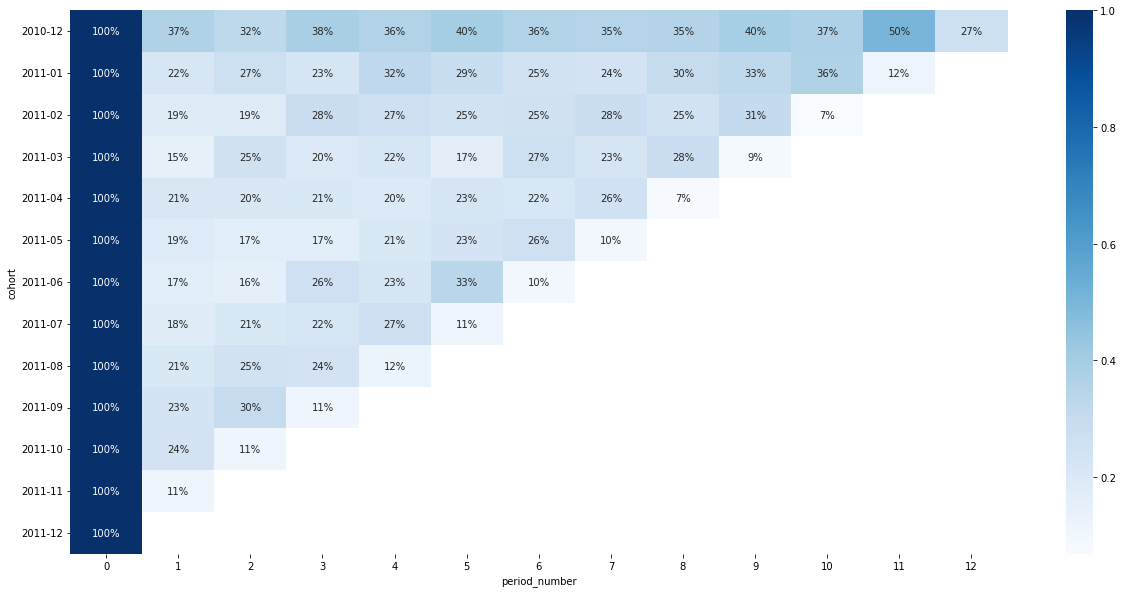

In [36]:
#create a percentage visual
plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table, annot=True, cmap='Blues', fmt='.0%')

<AxesSubplot:xlabel='period_number', ylabel='cohort'>

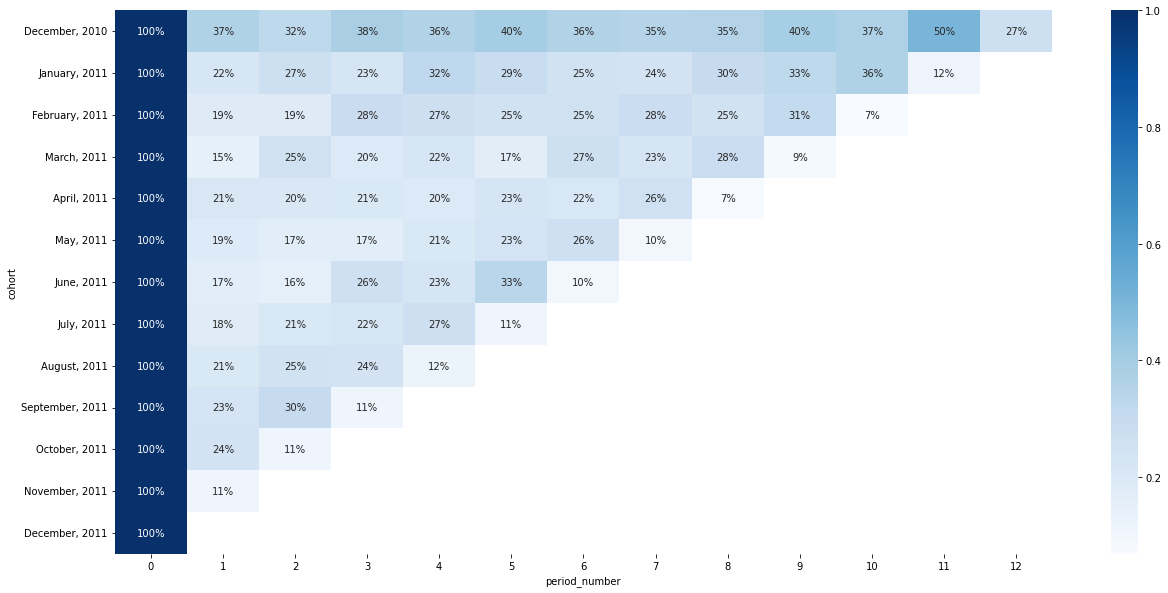

In [37]:
#change index
new_cohort_table.index = cohort_table.index.strftime('%B, %Y')
#for converting datetime into stringformat time- so fetching month and year.

#create a percentage visual
plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table, annot=True, cmap='Blues', fmt='.0%')

# Inferences

- From the above retention rate heatmap, we can see that there is an average retention of 30%-40% for the December 2010, with the highest retention rate occurring after 11 months (50%).
- For all the other CohortMonths, the average retention rates are around 18–25%.So,this %user are making transaction again as can seen in period number.
- As per this we can create strategies to increase customer retention either by providing discounts or by doing effective marketing, etc.

# Week 2

**1. Process of building RFM model.**

In [38]:
df_retail.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_month,cohort,period_number
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12,0


In [39]:
#Checking Minimum and Maximum dates.
print("Latest date in retail df is : ", df_retail['InvoiceDate'].max())
print("Oldest date in retail df is : ", df_retail['InvoiceDate'].min())

Latest date in retail df is :  2011-12-09 12:50:00
Oldest date in retail df is :  2010-12-01 08:26:00


In [40]:
#Recreating the RFM df by making some modification
RFM_df = df_retail.drop(['order_month','cohort','period_number'],axis=1)
RFM_df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom


In [41]:
#Adding Total sum column
RFM_df['Total sum']= RFM_df['Quantity'] * RFM_df['UnitPrice']
RFM_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total sum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [42]:
Online_RTL_Cleaned = RFM_df
Online_RTL_Cleaned.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total sum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [43]:
#Exporting the excel file for tableau input
Online_RTL_Cleaned.to_excel("Retail_cleaned.xlsx")

**2. Calculate RFM metric**

In [44]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total
#import datetime as dt
latest_date = dt.datetime(2011,12,10)
#Aggregate data on customer level
RFM_df= RFM_df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x :(latest_date-x.max()).days,
                                            'InvoiceNo': lambda x : x.count(), 
                                            'Total sum':lambda x : x.sum()})

In [45]:
#Rename the column to Recency, Frequency and Monetary

RFM_df.rename(columns = {'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency', 
                         'Total sum':'Monetary'}, inplace = True)
#RFM model
RFM_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


In [46]:
#reset the index to make all the columns at same level.
RFM_df.reset_index().head(2)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.6
1,12347.0,2,182,4310.0


In [47]:
#Descriptive statistics (Recency)
RFM_df['Recency'].describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

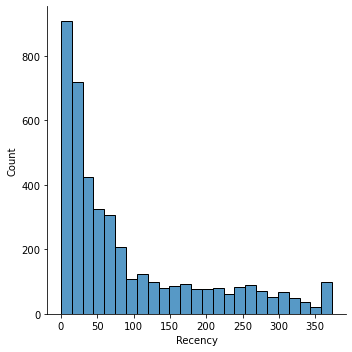

In [48]:
#Recency distribution plot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

x=RFM_df['Recency']

ax = sns.displot(x)

In [49]:
#Descriptive statistics (Frequency)
RFM_df['Frequency'].describe()

count    4338.000000
mean       90.523744
std       225.506968
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7676.000000
Name: Frequency, dtype: float64

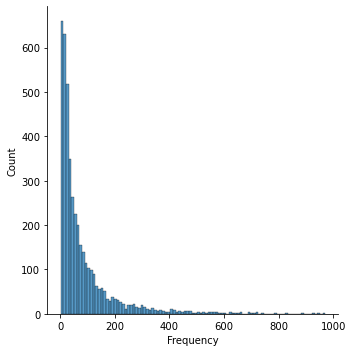

In [50]:
#Frequency distribution plot
y=RFM_df.query('Frequency < 1000')['Frequency']

sns.displot(y)

In [51]:
#Descriptive Statistics (Monetary)
RFM_df['Monetary'].describe()

count      4338.000000
mean       2048.688081
std        8985.230220
min           3.750000
25%         306.482500
50%         668.570000
75%        1660.597500
max      280206.020000
Name: Monetary, dtype: float64

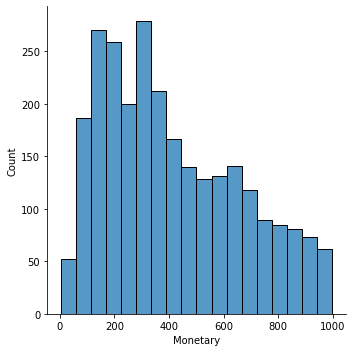

In [52]:
#Monetary distribution plot
z=RFM_df.query('Monetary < 1000')['Monetary']
sns.displot(z)

**3. Building RFM segments** 

In [53]:
#split into four segments using quantiles
#a quantile is where a sample is divided into equal-sized, adjacent, subgroups.

quantiles_df= RFM_df.quantile(q=[0.25,0.5,0.75])
quantiles_df

,Recency,Frequency,Monetary
0.25,17.00,17.0,306.4825
0.50,50.00,41.0,668.5700
0.75,141.75,98.0,1660.5975


In [54]:
##
#converting quantiles_dict to df

quantiles_dict = quantiles_df.to_dict()
quantiles_dict

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.48249999999996,
  0.5: 668.5700000000002,
  0.75: 1660.5974999999999}}

In [55]:
#Functions to create R, F and M segments

#Recency function to create R segment.
def r_score(x):
    if x <= quantiles_df['Recency'][.25]:
        return 1
    elif x <= quantiles_df['Recency'][.5]:
        return 2
    elif x <= quantiles_df['Recency'][.75]:
        return 3
    else:
        return 4

#Frequency and Monetary function to create F and M segment.
def fm_score(x, c):
    if x <= quantiles_df[c][.25]:
        return 4
    elif x <= quantiles_df[c][.5]:
        return 3
    elif x <= quantiles_df[c][.75]:
        return 2
    else:
        return 1    

In [56]:
#Calculate and Add R, F and M segment value columns in the existing dataset to show R, F and M segment values

RFM_df['R'] = RFM_df['Recency'].apply(lambda x: r_score(x))
RFM_df['F'] = RFM_df['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
RFM_df['M'] = RFM_df['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))
RFM_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [57]:
#3.b1. Combine three ratings to get a RFM segment (as strings)

#Calculate and Add RFMGroup value column showing combined concatenated score of RFM

RFM_df['RFMGroup']= RFM_df['R'].map(str) + RFM_df['F'].map(str) + RFM_df['M'].map(str) 
RFM_df.head(1)

,Recency,Frequency,Monetary,R,F,M,RFMGroup
CustomerID,,,,,,,
12346.0,325,1,77183.6,4,4,1,441


In [58]:
#3.b2. Get the RFM score by adding up the three ratings.

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFM_df['RFM Score'] = RFM_df['R'] + RFM_df['F'] + RFM_df['M']  #alternative - df[['R','F','M']].sum(axis=1)
RFM_df

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFM Score
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11
...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4,444,12
18281.0,180,7,80.82,4,4,4,444,12
18282.0,7,12,178.05,1,4,4,144,9


**Basic observation**:

- Basically, RFM score gives the score to the customers loyalty or engagement with the brand.
- in our case we assigned R- 1 to most frequent customer F,M- 1 is assigned to high frequency and monetary.
- Lower the value of RFM score is, the more loyal customer would be.
- above statement can change as per the assigment of values to column R, F and M.

In [59]:
#3.b3.Analyze the RFM segments by summarizing them
# Grouping of these customers ar per RFM scores to indicate what bussiness action should be taken on the basis of type of customer
#customer type means TOP Category,MID Category and LOW category customers

In [60]:
#TOP customers category.
df_TOP_cust = RFM_df[(RFM_df['RFM Score']>= 3) & (RFM_df['RFM Score']< 7)]
df_TOP_cust.reset_index(inplace=True)
df_TOP_cust.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFM Score
0,12347.0,2,182,4310.00,1,1,1,111,3
1,12349.0,18,73,1757.55,2,2,1,221,5
2,12352.0,36,85,2506.04,2,2,1,221,5
3,12356.0,22,59,2811.43,2,2,1,221,5
4,12357.0,33,131,6207.67,2,1,1,211,4


In [61]:
print('TOP customers of online retail are :', df_TOP_cust['CustomerID'].nunique() )

TOP customers of online retail are : 1671


In [62]:
#Middle category customers
df_MID_cust = RFM_df[(RFM_df['RFM Score']>= 7) & (RFM_df['RFM Score']< 10)]
df_MID_cust.reset_index(inplace=True)
df_MID_cust.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFM Score
0,12346.0,325,1,77183.60,4,4,1,441,9
1,12348.0,75,31,1797.24,3,3,1,331,7
2,12354.0,232,58,1079.40,4,2,2,422,8
3,12363.0,109,23,552.00,3,3,3,333,9
4,12367.0,4,11,168.90,1,4,4,144,9


In [63]:
print('Middle category customers of online retail are :', df_MID_cust['CustomerID'].nunique() )

Middle category customers of online retail are : 1376


In [64]:
#LOW category CUSTOMERS
df_low_cust = RFM_df[RFM_df['RFM Score']>= 10]
df_low_cust.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFM Score
CustomerID,,,,,,,,
12350.0,310,17,334.40,4,4,3,443,11
12353.0,204,4,89.00,4,4,4,444,12
12355.0,214,13,459.40,4,4,3,443,11
12361.0,287,10,189.90,4,4,4,444,12
12365.0,291,22,641.38,4,3,3,433,10


In [65]:
df_low_cust.reset_index(inplace= True)
df_low_cust.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFM Score
0,12350.0,310,17,334.40,4,4,3,443,11
1,12353.0,204,4,89.00,4,4,4,444,12
2,12355.0,214,13,459.40,4,4,3,443,11
3,12361.0,287,10,189.90,4,4,4,444,12
4,12365.0,291,22,641.38,4,3,3,433,10


In [66]:
print('Low category level customers of online retail are :', df_low_cust['CustomerID'].nunique() )


Low category level customers of online retail are : 1291


<AxesSubplot:title={'center':'Customery category as per RFM score'}, xlabel='Customer Type', ylabel='No. of customers'>

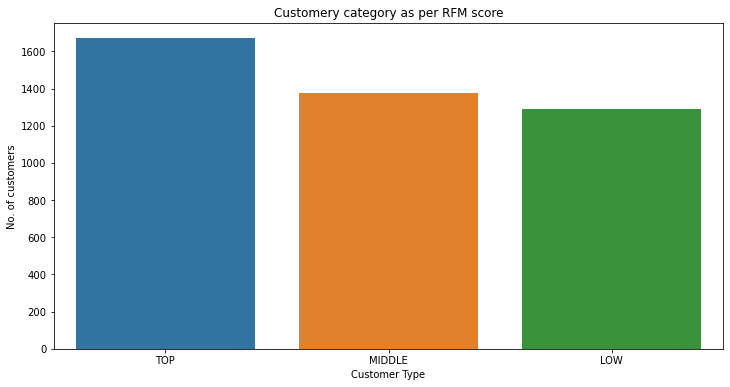

In [67]:
plt.figure(figsize=(12,6))
plt.xlabel('Customer Type')
plt.ylabel('No. of customers')
plt.title('Customery category as per RFM score')
sns.barplot(x=['TOP','MIDDLE','LOW'],y=[df_TOP_cust['CustomerID'].nunique(), df_MID_cust['CustomerID'].nunique(), df_low_cust['CustomerID'].nunique()] )

**Inferences:**
    
- Top customers - Basically who are buying more and visiting recently.
- Medium customer type -  Group which spends less than the high group and is not that much frequent to visit the platform.
- Low customer type - Group which is on the verge of churning out.
- Company design target compaigns for Medium and Low type customers.
- Target compaigns might be in form discount, effective marketing,etc.

# Week 3

**Data preparation for the Algorithm.**
- Managing the data which asymmetrically distributed in Receny, Frequency, Monetary Plot distribution, seen in earlier cells.
- To remove the asymmetricity, log transformation would be used.
- The log transformation cannot be used for negative values and zero, we need to remove them.


In [68]:
RFM_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFM Score
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [69]:
RFM_df[['Recency','Frequency','Monetary']].min()

Recency      0.00
Frequency    1.00
Monetary     3.75
dtype: float64

In [70]:
#Handle negative and zero values so as to handle infinite numbers during log transformation

def handle_neg_n_zero(num):

    if num <= 0:
        return 1
    else:
        return num
        
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFM_df['Recency'] = [handle_neg_n_zero(x) for x in RFM_df.Recency]
RFM_df['Monetary'] = [handle_neg_n_zero(x) for x in RFM_df.Monetary]



In [71]:
#Perform Log transformation to bring data into normal or near normal distribution

Log_Trans_df = RFM_df[['Recency','Frequency','Monetary']].apply(np.log, axis=1).round(3)
Log_Trans_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.784,0.000,11.254
12347.0,0.693,5.204,8.369
12348.0,4.317,3.434,7.494
12349.0,2.890,4.290,7.472
12350.0,5.737,2.833,5.812


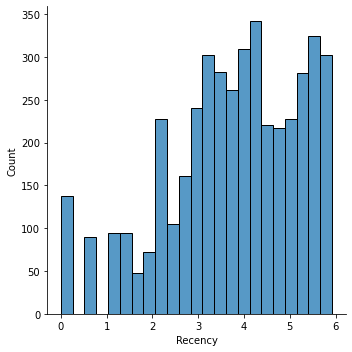

In [72]:
#Data distribution after data normalization for Recency

Recency_Plot = Log_Trans_df['Recency']
sns.displot(Recency_Plot)

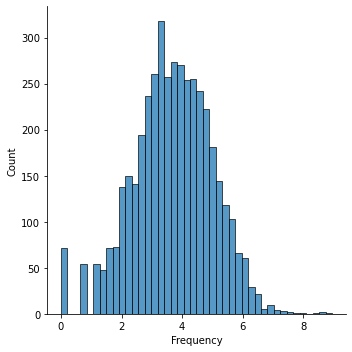

In [73]:
#Data distribution after data normalization for Frequency

Frequency_Plot = Log_Trans_df['Frequency']
sns.displot(Frequency_Plot)

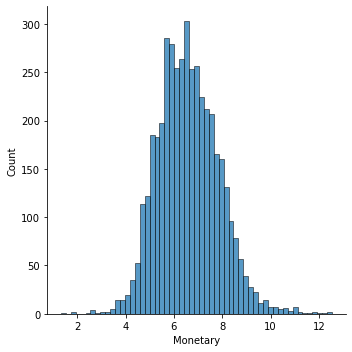

In [74]:
#Data distribution after data normalization for Monetary

Monetary_Plot = Log_Trans_df['Monetary']
sns.displot(Monetary_Plot)

# Additonal Info : For study purpose

- Log transformation was to remove the skewness.
- We also see that we do not get a constant mean and standard deviation values. To check that, we will standardize the data.
- Applying the log transformation on the data first and passing it through the StandardScaler() method from the sklearn library, we obtained the preprocessed data



In [75]:
from sklearn.preprocessing import StandardScaler
#Bring the data to same scale

sc_object= StandardScaler()
Scaled_data = sc_object.fit_transform(Log_Trans_df)

#Transform it back to dataframe

Scaled_data = pd.DataFrame(Scaled_data,index = RFM_df.index, columns = Log_Trans_df.columns )

In [76]:
# Building the Model

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11) :
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(Scaled_data)
    wcss.append(kmeans.inertia_)
    
wcss

[13014.000000000056,
 6891.51268014977,
 5309.113789849766,
 4455.58900039138,
 3772.818805601972,
 3370.9894590895865,
 3051.468705607667,
 2798.881160976508,
 2624.81530242105,
 2464.6890773063315]

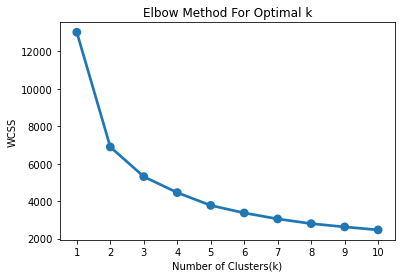

In [77]:
#Visualizing the ELBOW to get the optimal value of K
#Plot the graph for the sum of square distance values(WCSS) and Number of Clusters

sns.pointplot(x = list(range(1,11)), y = list(wcss))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

In [78]:
#Perform model building using K means Clustering

kmeansmodel = KMeans(n_clusters=3, random_state=0)
kmeansmodel.fit(Scaled_data)

KMeans(n_clusters=3, random_state=0)

In [79]:
#Find the cluster for the observation given in the dataset
RFM_df['Cluster']= kmeansmodel.labels_
RFM_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFM Score,Cluster
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,1
12347.0,2,182,4310.00,1,1,1,111,3,2
12348.0,75,31,1797.24,3,3,1,331,7,1
12349.0,18,73,1757.55,2,2,1,221,5,1
12350.0,310,17,334.40,4,4,3,443,11,0


<Figure size 504x504 with 0 Axes>

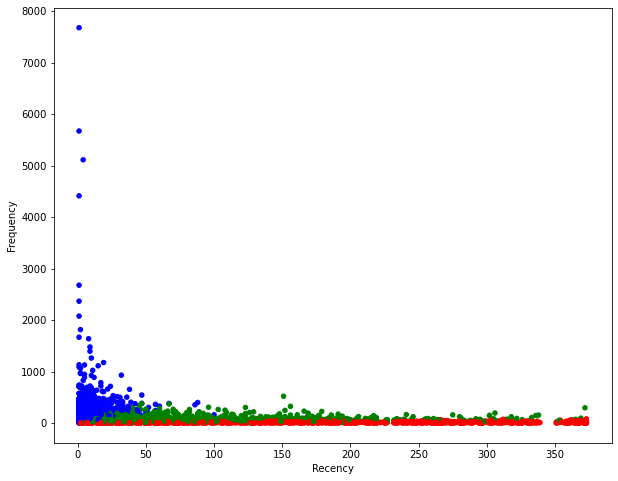

In [80]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

#MAP-whenver you want to apply some functionality on each element/ row of  one list| tupple | series | Column

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFM_df['Color'] = RFM_df['Cluster'].map(lambda p: Colors[p])
ax = RFM_df.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = RFM_df['Color']
)

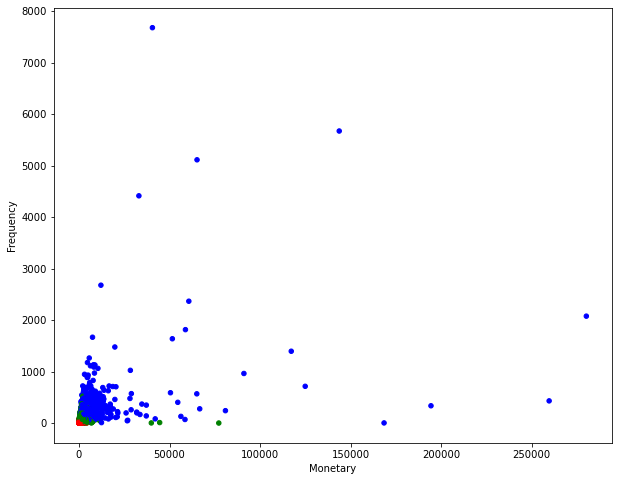

In [81]:
##Scatter Plot Monetary Vs Frequency
Colors = ["red", "green", "blue"]
RFM_df['Color'] = RFM_df['Cluster'].map(lambda p: Colors[p])
ax = RFM_df.plot(    
    kind="scatter", 
    x="Monetary", y="Frequency",
    figsize=(10,8),
    c = RFM_df['Color']
    
)

In [82]:
#Exporting the excel file for tableau input
RFM_df.to_excel("Retail.xlsx")

# Tableau Link

https://public.tableau.com/authoring/retail_16594199913450/RFMDB#1